# Exercise 5.10

In [1]:
import numpy as np
import pandas as pd
import pathlib
from IPython.display import display, Math
from scipy import stats
from chapter_5_utils import simult_conf_int, bonferroni_conf_int, plot_confidence_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    # Bear growth data from Example 1.10.
    fpth = pathlib.Path(r'..\..\data\Table1.4.xlsx')
    return pd.read_excel(fpth)

In [3]:
bear_df = load_data()

In [4]:
# X is n x p = 7 x 4.
X = bear_df.iloc[:, 5:].to_numpy()
n, p = X.shape
alpha = 0.05

In [5]:
X

array([[141, 157, 168, 183],
       [140, 168, 174, 170],
       [145, 162, 172, 177],
       [146, 159, 176, 171],
       [150, 158, 168, 175],
       [142, 140, 178, 189],
       [139, 171, 176, 175]], dtype=int64)

## (a)

In [6]:
S = np.cov(X, rowvar=False)
xbar = np.mean(X, axis=0).reshape(p, 1)
f_crit = stats.f.ppf(1-alpha, p, n-p)
const = ((n-1)*p)/(n-p)

$$
\bar{x}_{i}
\pm
\sqrt{
    \frac{(n-1)p}{(n-p)}
    F_{p, n-p}\left(\alpha\right)
}
\sqrt{
    \frac{s_{ii}}{n}
}
$$

In [7]:
T2_simul_ci = simult_conf_int(X, alpha)

In [8]:
for i in range(T2_simul_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{S[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{T2_simul_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {T2_simul_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (b)

In [9]:
a1 = np.array([-1, 1, 0, 0]).reshape(p, 1)
a2 = np.array([0, -1, 1, 0]).reshape(p, 1)
a3 = np.array([0, 0, -1, 1]).reshape(p, 1)

# Combine the 3 linear combinations into a matrix A.
# Can use Result 3.6 on page 144.
A = np.vstack([a1.T, a2.T, a3.T])

# X is n by p, so each row in X is x_{i}^{\prime}.
X_diff = X @ A.T
X_diff

array([[16, 11, 15],
       [28,  6, -4],
       [17, 10,  5],
       [13, 17, -5],
       [ 8, 10,  7],
       [-2, 38, 11],
       [32,  5, -1]], dtype=int64)

In [10]:
# Just checking to make sure Result 3.6 holds.
assert np.all(np.isclose(A @ S @ A.T, np.cov(X_diff, rowvar=False)))
assert np.all(np.isclose((A @ xbar), np.mean(X_diff, axis=0).reshape(p-1, 1)))

$$
\textbf{a}_{i}^{\prime}\bar{\textbf{x}}
\pm
\sqrt{
    \frac{(n-1)p}{(n-p)}
    F_{p, n-p}
    \left(\alpha\right)
    }
\sqrt{
    \frac{
        \textbf{a}_{i}^{\prime}
        \textbf{S}
        \textbf{a}_{i}
        }{
            n
        }
    }
$$

In [11]:
# Pass the number of parameters p as an argument.
diff_T2_simul_ci = simult_conf_int(X_diff, alpha, p)

In [12]:
for i in range(diff_T2_simul_ci.shape[0]):
    display(Math(fr'{(A@xbar)[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{(A@S@A.T)[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{diff_T2_simul_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {diff_T2_simul_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (c)

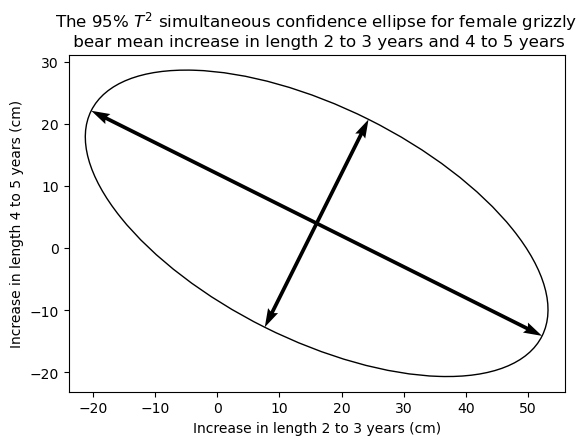

In [13]:
my_plot, ax = plot_confidence_ellipse(X_diff[:, [0,2]], n, p, alpha)
ax.set_aspect('equal')
ax.set_title('The 95% $T^{2}$ simultaneous confidence ellipse'\
             ' for female grizzly \n bear mean increase in length 2 to 3'\
                ' years and 4 to 5 years')
my_plot.xlabel('Increase in length 2 to 3 years (cm)')
my_plot.ylabel('Increase in length 4 to 5 years (cm)')
my_plot.savefig('Question-5-10-c.png')
my_plot.show()

## (d)

$$
\bar{x}_{i}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
            s_{ii}
        }{
            n
        }
    }
$$

In [14]:
bonfer_ci = bonferroni_conf_int(X, p, alpha)

In [15]:
m=4
t_crit = stats.t.ppf(1-(alpha/(2*m)), n-1)
print('Bonferroni confidence intervals for the 4 mean lengths')
for i in range(bonfer_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{S[i,i]:.2f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 4 mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$
\textbf{a}_{i}^{\prime}\bar{\textbf{x}}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
        \textbf{a}_{i}^{\prime}
        \textbf{S}
        \textbf{a}_{i}
        }{
            n
        }
    }
$$

In [16]:
m = p+3
diff_bonfer_ci = bonferroni_conf_int(X_diff, m, alpha)

In [17]:
t_crit = stats.t.ppf(1-(alpha/(2*m)), n-1)
print('Bonferroni confidence intervals for the 3 yearly increases in  mean lengths')
for i in range(diff_bonfer_ci.shape[0]):
    display(Math(fr'{(A @ xbar)[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{(A@S@A.T)[i,i]:.2f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{diff_bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {diff_bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 3 yearly increases in  mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (e)

In [18]:
idx_23_45 = [0,2]
diff_T2_simul_ci = diff_T2_simul_ci[idx_23_45]
diff_bonfer_ci = diff_bonfer_ci[idx_23_45]

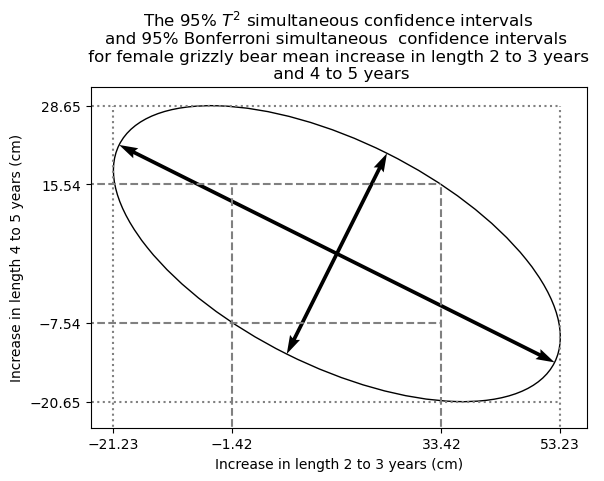

In [19]:
my_plot, ax = plot_confidence_ellipse(X_diff[:, idx_23_45], n, p, alpha)
ax.set_title('The 95% $T^{2}$ simultaneous confidence intervals \n'\
             'and 95% Bonferroni simultaneous  confidence intervals \n'\
             ' for female grizzly bear mean increase in length 2 to 3'\
                ' years \n and 4 to 5 years')

# Draw dashed lines at the simultaneous T^2 values (2 to 3 years).
ax.plot([diff_T2_simul_ci[0,0], diff_T2_simul_ci[0,0]], [-35, diff_T2_simul_ci[1,1]], linestyle=':', color='gray', label='$T^{2}$')
ax.plot([diff_T2_simul_ci[0,1], diff_T2_simul_ci[0,1]], [-35, diff_T2_simul_ci[1,1]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values (4 to 5 years).
ax.plot([-35, diff_T2_simul_ci[0,1]], [diff_T2_simul_ci[1,1], diff_T2_simul_ci[1,1]], linestyle=':', color='gray')
ax.plot([-35, diff_T2_simul_ci[0,1]], [diff_T2_simul_ci[1,0], diff_T2_simul_ci[1,0]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values (2 to 3 years).
ax.plot([diff_bonfer_ci[0,0], diff_bonfer_ci[0,0]], [-35, diff_bonfer_ci[1,1]], linestyle='--', color='gray', label='$Bonferroni$')
ax.plot([diff_bonfer_ci[0,1], diff_bonfer_ci[0,1]], [-35, diff_bonfer_ci[1,1]], linestyle='--', color='gray')

# Draw dashed lines at the simultaneous T^2 values (4 to 5 years).
ax.plot([-35, diff_bonfer_ci[0,1]], [diff_bonfer_ci[1,1], diff_bonfer_ci[1,1]], linestyle='--', color='gray')
ax.plot([-35, diff_bonfer_ci[0,1]], [diff_bonfer_ci[1,0], diff_bonfer_ci[1,0]], linestyle='--', color='gray')

# Label simultaneous CI on the axis.
ax.set_xticks(np.append(diff_T2_simul_ci[0,:], diff_bonfer_ci[0, :], axis=0))
ax.set_yticks(np.append(diff_T2_simul_ci[1,:], diff_bonfer_ci[1, :], axis=0))
# ax.legend()

my_plot.xlabel('Increase in length 2 to 3 years (cm)')
my_plot.ylabel('Increase in length 4 to 5 years (cm)')
ax.set_xlim(-25)
ax.set_ylim(-25)
ax.set_aspect('equal')

my_plot.savefig('Question-5-10-e.png')